# pygame 快速入门

## 目标

1. 项目准备
2. 使用 `pygame` 创建图形窗口
3. 理解 **图像** 并实现图像绘制
4. 理解 **游戏循环** 和 **游戏时钟**
5. 理解 **精灵** 和 **精灵组**

## 项目准备

1. 新建 **飞机大战** 项目
2. 新建一个 `hm_01_pygame入门.py`
3. 导入 **游戏素材图片**

**游戏的第一印象**

* 把一些 **静止的图像** 绘制到 **游戏窗口** 中
* 根据 **用户的交互** 或其他情况，**移动** 这些图像，产生动画效果
* 根据 **图像之间** 是否发生重叠，判断 **敌机是否被摧毁** 等其他情况

## 01. 使用 `pygame` 创建图形窗口

### 小节目标

1. 游戏的初始化和退出
2. 理解游戏中的坐标系
3. 创建游戏主窗口
4. 简单的游戏循环

> 可以将图片素材 **绘制** 到 **游戏的窗口** 上，开发游戏之前需要先知道 **如何建立游戏窗口**！

### 1.1 游戏的初始化和退出

* 要使用 `pygame` 提供的所有功能之前，需要调用 `init` 方法
* 在游戏结束前需要调用一下 `quit` 方法 

| 方法 | 说明 |
| :---: | :---: |
| `pygame.init()` | 导入并初始化所有 `pygame` 模块，使用其他模块之前，必须先调用 `init` 方法 |
| `pygame.quit()` | 卸载所有 `pygame` 模块，在游戏结束之前调用！ |

In [2]:
import pygame

#加载并初始化游戏
pygame.init()
print("游戏代码")

#退出游戏
pygame.quit()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
游戏代码


### 1.2 理解游戏中的坐标系

* **坐标系**
    * **原点** 在 **左上角** `(0, 0)`
    * **x 轴** 水平方向向 **右**，逐渐增加
    * **y 轴** 垂直方向向 **下**，逐渐增加

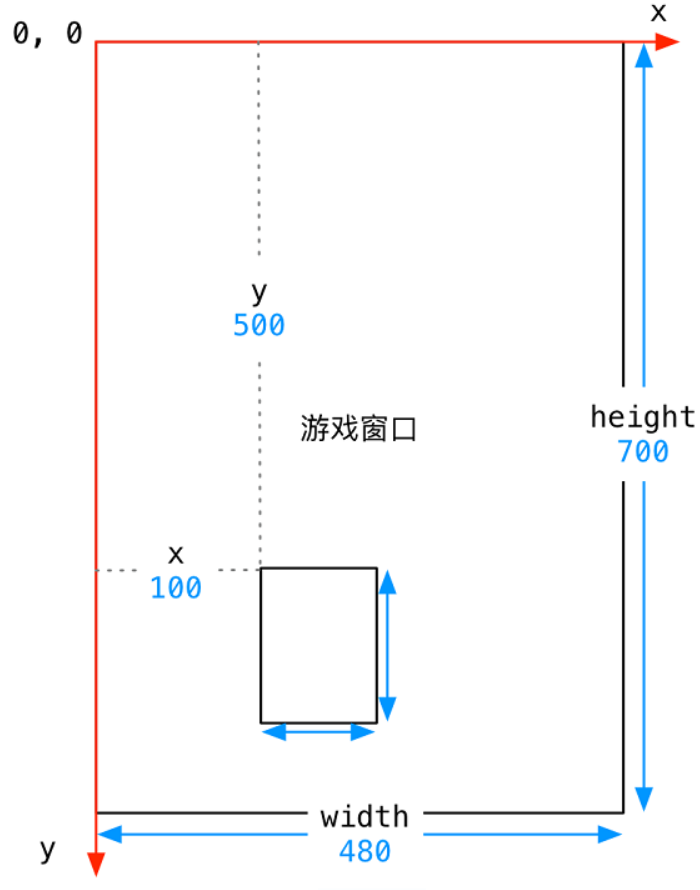

* 在游戏中，**所有可见的元素** 都是以 **矩形区域** 来描述位置的
    * 要描述一个矩形区域有四个要素：`(x, y) (width, height)`

* `pygame` 专门提供了一个类 `pygame.Rect` 用于描述 **矩形区域**

```python
Rect(x, y, width, height) -> Rect
```
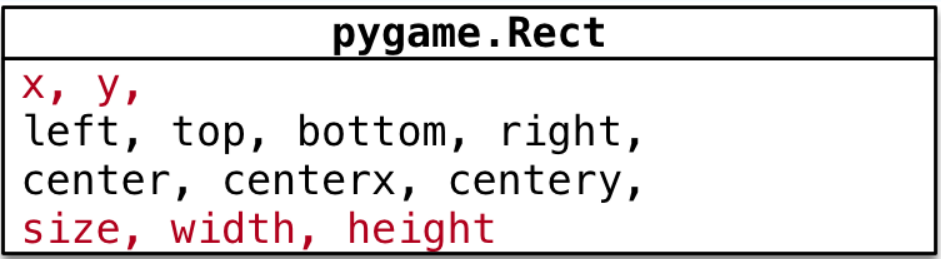

**提示**

* `pygame.Rect` 是一个比较特殊的类，内部只是封装了一些数字计算
* 不执行 `pygame.init()` 方法同样能够直接使用

#### 案例演练

**需求**

1. 定义 `hero_rect` 矩形描述 **英雄的位置和大小**
2. 输出英雄的 **坐标原点**（`x` 和 `y`）
3. 输出英雄的 **尺寸**（**宽度** 和 **高度**）


In [12]:
hero_rect = pygame.Rect(100,500,120,125)
print("%d %d"%(hero_rect.x,hero_rect.y))
print("%d %d"%(hero_rect.width,hero_rect.height))
hero_rect.size  #元组

100 500
120 125


(120, 125)

### 1.3 创建游戏主窗口

* `pygame` 专门提供了一个 **模块** `pygame.display` 用于创建、管理 **游戏窗口**

| 方法 | 说明 |
| --- | --- |
| `pygame.display.set_mode()` | 初始化游戏显示窗口 |
| `pygame.display.update()` | 刷新屏幕内容显示，稍后使用 | 

**`set_mode` 方法**

```python
set_mode(resolution=(0,0), flags=0, depth=0) -> Surface
```

* **作用** —— 创建游戏显示窗口
* **参数**
    * `resolution` 指定屏幕的 `宽` 和 `高`，默认创建的窗口大小和屏幕大小一致
    * `flags` 参数指定屏幕的附加选项，例如是否全屏等等，默认不需要传递
    * `depth` 参数表示颜色的位数，默认自动匹配
* **返回值**
    * **暂时** 可以理解为 **游戏的屏幕**，**游戏的元素** 都需要被绘制到 **游戏的屏幕** 上

* **注意**：必须使用变量记录 `set_mode` 方法的返回结果！因为：后续所有的图像绘制都基于这个返回结果

```python
# 创建游戏主窗口
screen = pygame.display.set_mode((480, 700))
```

### 1.4 简单的游戏循环

* 为了做到游戏程序启动后，**不会立即退出**，通常会在游戏程序中增加一个 **游戏循环**
* 所谓 **游戏循环** 就是一个 **无限循环**
* 在 **创建游戏窗口** 代码下方，增加一个无限循环
    * 注意：**游戏窗口不需要重复创建**

```python
# 创建游戏主窗口
screen = pygame.display.set_mode((480, 700))

# 游戏循环
while True:
    pass
```

In [3]:
import pygame
pygame.init()

#创建游戏窗口480*700
pygame.display.set_mode((480,700))

pygame.quit()

## 02. 理解 **图像** 并实现图像绘制

* 在游戏中，能够看到的 **游戏元素** 大多都是 **图像**
    * **图像文件** 初始是保存在磁盘上的，如果需要使用，**第一步** 就需要 **被加载到内存**
* 要在屏幕上 **看到某一个图像的内容**，需要按照三个步骤：
    1. 使用 `pygame.image.load()` **加载图像的数据**
    2. 使用 **游戏屏幕** 对象，调用 `blit` 方法 将图像绘制到指定位置
    3. 调用 `pygame.display.update()` 方法更新整个屏幕的显示

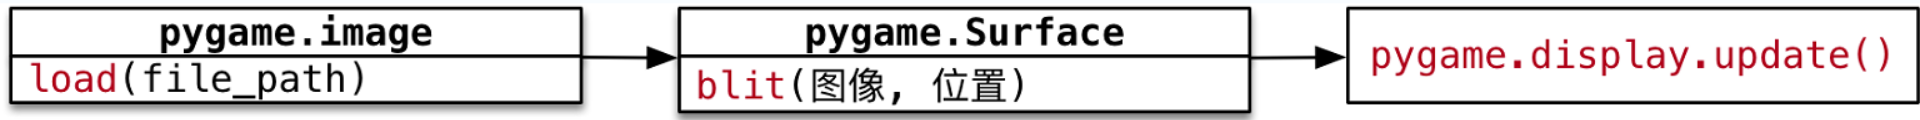

> 提示：要想在屏幕上看到绘制的结果，就一定要调用 `pygame.display.update()` 方法

### 代码演练 I —— 绘制背景图像

**需求**

1. 加载 `background.png` 创建背景
2. 将 **背景** 绘制在屏幕的 `(0, 0)` 位置
3. 调用屏幕更新显示背景图像

```python
# 绘制背景图像
# 1> 加载图像
bg = pygame.image.load("./images/background.png")

# 2> 绘制在屏幕
screen.blit(bg, (0, 0))

# 3> 更新显示
pygame.display.update()
```

### 代码演练 II —— 绘制英雄图像

**需求**

1. 加载 `me1.png` 创建英雄飞机
2. 将 **英雄飞机** 绘制在屏幕的 `(200, 500)` 位置
3. 调用屏幕更新显示飞机图像

```python
# 1> 加载图像
hero = pygame.image.load("./images/me1.png")

# 2> 绘制在屏幕
screen.blit(hero, (200, 500))

# 3> 更新显示
pygame.display.update()
```

**透明图像** 

* `png` 格式的图像是支持 **透明** 的
* 在绘制图像时，**透明区域** 不会显示任何内容
* 但是如果**下方已经有内容**，会 **透过** **透明区域** 显示出来

### 理解 `update()` 方法的作用

> 可以在 `screen` 对象完成 **所有** `blit` 方法之后，**统一调用一次** `display.update` 方法，同样可以在屏幕上 **看到最终的绘制结果**

* 使用 `display.set_mode()` 创建的 `screen` **对象** 是一个 **内存中的屏幕数据对象**
    * 可以理解成是 **油画** 的 **画布**
* `screen.blit` 方法可以在 **画布** 上绘制很多 **图像**
    * 例如：**英雄**、**敌机**、**子弹**...
    * **这些图像** 有可能 会彼此 **重叠或者覆盖**
* `display.update()` 会将 **画布** 的 **最终结果** 绘制在屏幕上，这样可以 **提高屏幕绘制效率**，**增加游戏的流畅度**

**案例调整**

```python
# 绘制背景图像
# 1> 加载图像
bg = pygame.image.load("./images/background.png")

# 2> 绘制在屏幕
screen.blit(bg, (0, 0))

# 绘制英雄图像
# 1> 加载图像
hero = pygame.image.load("./images/me1.png")

# 2> 绘制在屏幕
screen.blit(hero, (200, 500))

# 3> 更新显示 - update 方法会把之前所有绘制的结果，一次性更新到屏幕窗口上
pygame.display.update()
```


In [2]:
import pygame
import time
pygame.init()

#创建游戏窗口480*700
screen = pygame.display.set_mode((480,700))

#绘制背景图像
# 1.加载图像数据
bg = pygame.image.load("./images/background.png")
# 2.blit绘制图像
screen.blit(bg,(0,0))
# 3. update更新屏幕显示
# pygame.display.update()

# 绘制英雄飞机
hero = pygame.image.load("./images/me1.png")
screen.blit(hero,(150,500))

#在所有绘制完成之后使用update
pygame.display.update()

time.sleep(3)
pygame.quit()

## 03. 理解 **游戏循环** 和 **游戏时钟**

> 现在 **英雄飞机** 已经被绘制到屏幕上了，**怎么能够让飞机移动呢** ？

### 3.1 游戏中的动画实现原理

* 跟 **电影** 的原理类似，游戏中的动画效果，本质上是 **快速** 的在屏幕上绘制 **图像**
    * 电影是将多张 **静止的电影胶片** **连续、快速**的播放，产生连贯的视觉效果！
* 一般在电脑上 **每秒绘制 60 次**，就能够达到非常 **连续** **高品质** 的动画效果
    * 每次绘制的结果被称为 **帧 Frame**

### 3.2 **游戏循环**

#### 游戏的两个组成部分

> **游戏循环的开始** 就意味着 **游戏的正式开始**

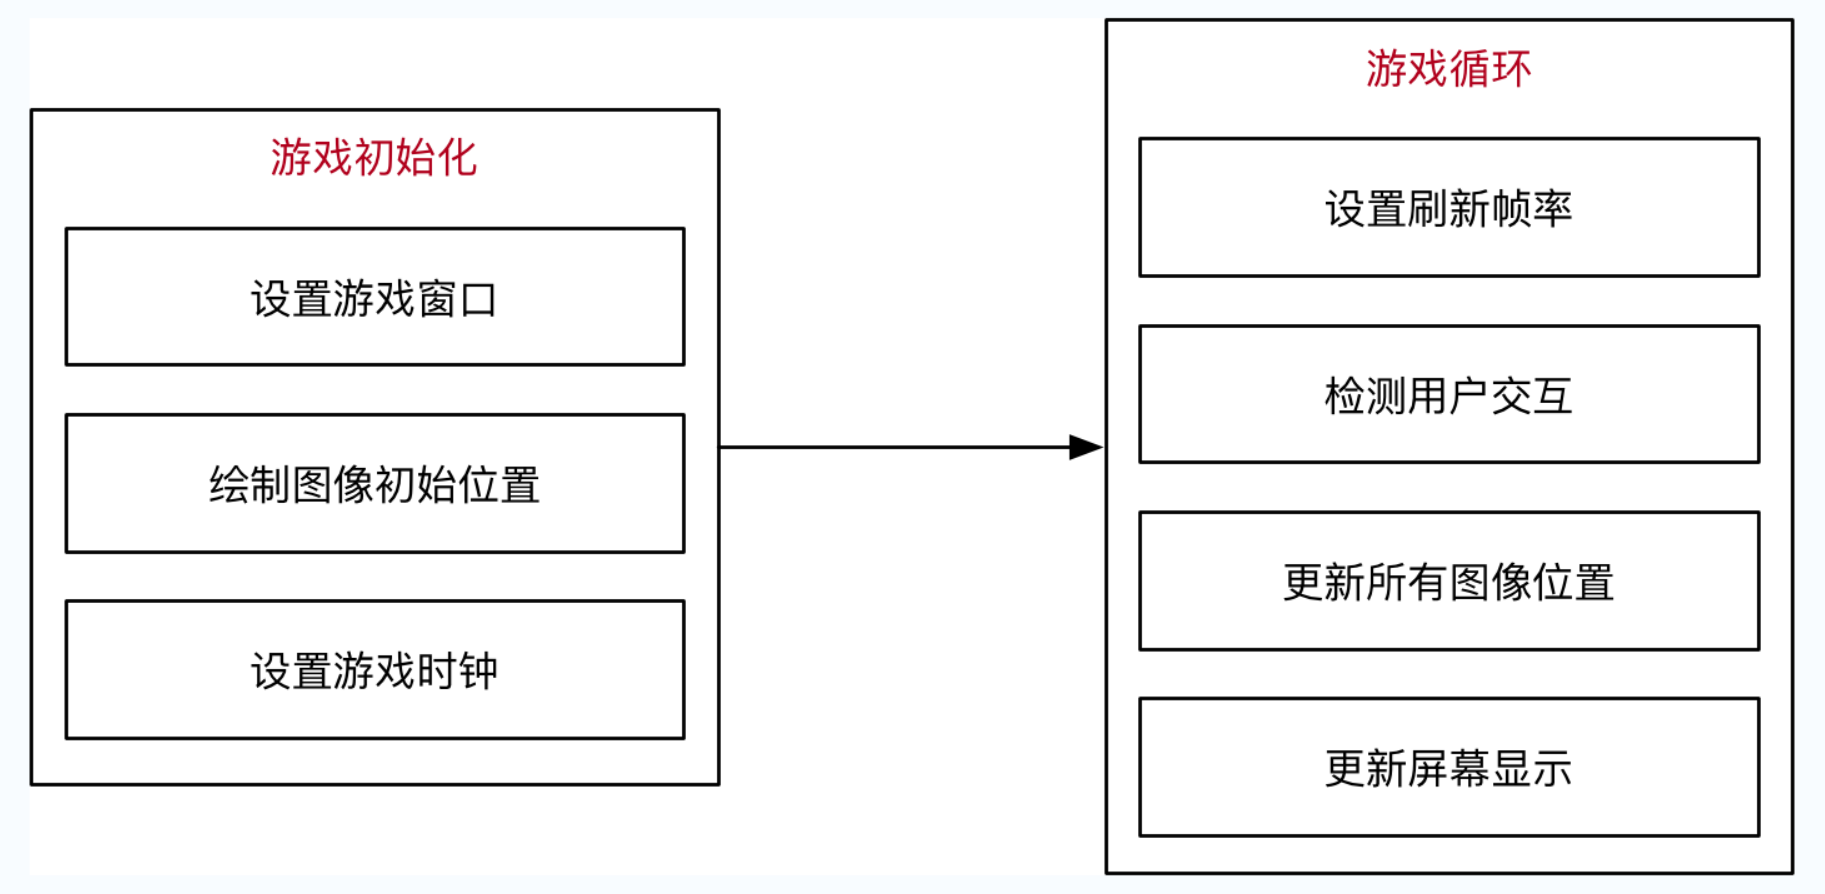

#### 游戏循环的作用

1. 保证游戏 **不会直接退出**
2. **变化图像位置** —— 动画效果
    * 每隔 `1 / 60 秒` 移动一下所有图像的位置
    * 调用 `pygame.display.update()` 更新屏幕显示
3. **检测用户交互** —— 按键、鼠标等...

### 3.3 游戏时钟

* `pygame` 专门提供了一个类 `pygame.time.Clock` 可以非常方便的设置屏幕绘制速度 —— **刷新帧率**
* 要使用 **时钟对象** 需要两步：
    * 1）在 **游戏初始化** 创建一个 **时钟对象**
    * 2）在 **游戏循环** 中让时钟对象调用 `tick(帧率)` 方法 
* `tick` 方法会根据 **上次被调用的时间**，自动设置 **游戏循环** 中的延时

### 3.4 英雄的简单动画实现

**需求**

1. 在 **游戏初始化** 定义一个 `pygame.Rect` 的变量记录英雄的初始位置
2. 在 **游戏循环** 中每次让 **英雄** 的 `y - 1` —— 向上移动 
3. `y <= 0` 将英雄移动到屏幕的底部

> 提示：
> 
> * 每一次调用 `update()` 方法之前，需要把 **所有的游戏图像都重新绘制一遍**
> * 而且应该 **最先** 重新绘制 **背景图像**


In [1]:
import pygame
import time
pygame.init()

#创建游戏窗口480*700
screen = pygame.display.set_mode((480,700))

#绘制背景图像
# 1.加载图像数据
bg = pygame.image.load("./images/background.png")
# 2.blit绘制图像
screen.blit(bg,(0,0))

# 绘制英雄飞机
hero = pygame.image.load("./images/me1.png")
screen.blit(hero,(150,500))

#创建时钟对象
clock = pygame.time.Clock()

#游戏循环 —>意味着游戏开始
# 4. 定义英雄的初始位置
hero_rect = pygame.Rect(150, 500, 102, 126)

while True:

    # 可以指定循环体内部的代码执行的频率
    clock.tick(60)

#     # 捕获事件
#     event_list = pygame.event.get()
#     if len(event_list) > 0:
#         print(event_list)
     
    
    # 更新英雄位置
    hero_rect.y -= 1

    # 如果移出屏幕，则将英雄的顶部移动到屏幕底部
    if hero_rect.y <= -126:
        hero_rect.y = 700

    # 绘制背景图片
    screen.blit(bg, (0, 0))
    # 绘制英雄图像
    screen.blit(hero, hero_rect)

    # 更新显示
    pygame.display.update()
    # 监听事件
    for event in pygame.event.get():

        # 判断用户是否点击了关闭按钮
        if event.type == pygame.QUIT:   #pygame定义的quit事件
            print("退出游戏...")

            pygame.quit()

            # 直接退出系统
            exit()   
time.sleep(3)
pygame.quit()

pygame 2.0.1 (SDL 2.0.14, Python 3.8.8)
Hello from the pygame community. https://www.pygame.org/contribute.html
退出游戏...


error: display Surface quit

### 3.5 在游戏循环中 监听 事件 

#### 事件 `event`

* 就是游戏启动后，**用户针对游戏所做的操作**
* 例如：**点击关闭按钮**，**点击鼠标**，**按下键盘**...

#### 监听

* 在 **游戏循环** 中，判断用户 **具体的操作**

> 只有 **捕获** 到用户具体的操作，才能有针对性的做出响应

#### 代码实现

* `pygame` 中通过 `pygame.event.get()` 可以获得 **用户当前所做动作** 的 **事件列表**
    * 用户可以同一时间做很多事情,比如点击鼠标同时按键盘
* 提示：**这段代码非常的固定**，几乎所有的 `pygame` 游戏都 **大同小异**！

In [6]:
#游戏循环，监听退出pygame的固定模式
while True:

    # 设置屏幕刷新帧率
    clock.tick(60)

    # 事件监听
    for event in pygame.event.get():

        # 判断用户是否点击了关闭按钮
        if event.type == pygame.QUIT:
            print("退出游戏...")

            pygame.quit()

            # 直接退出系统
            exit()

## 04. 理解 **精灵** 和 **精灵组**

### 4.1 精灵 和 精灵组

* 在刚刚完成的案例中，**图像加载**、**位置变化**、**绘制图像** 都需要程序员编写代码分别处理
* 为了简化开发步骤，`pygame` 提供了两个类
    * `pygame.sprite.Sprite` —— 存储 **图像数据 image** 和 **位置 rect** 的 **对象**
    * `pygame.sprite.Group`

#### 精灵

* 在游戏开发中，通常把 **显示图像的对象** 叫做精灵 `Sprite`
* **精灵** 需要 有 **两个重要的属性**
    * `image` 要显示的图像
    * `rect` 图像要显示在屏幕的位置
* 默认的 `update()` 方法什么事情也没做
    * 子类可以重写此方法，在每次刷新屏幕时，更新精灵位置

* **注意**：`pygame.sprite.Sprite` 并没有提供 `image` 和 `rect` 两个属性
    * 需要程序员从 `pygame.sprite.Sprite` 派生子类
    * 并在 **子类** 的 **初始化方法** 中，设置 `image` 和 `rect` 属性

#### 精灵组

* 一个 **精灵组** 可以包含多个 **精灵** 对象
* 调用 **精灵组** 对象的 `update()` 方法
    * 可以 **自动** 调用 **组内每一个精灵** 的 `update()` 方法
* 调用 **精灵组** 对象的 `draw(屏幕对象)` 方法
    * 可以将 **组内每一个精灵** 的 `image` 绘制在 `rect` 位置

```python
Group(*sprites) -> Group
```

> 注意：仍然需要调用 `pygame.display.update()` 才能在屏幕看到最终结果

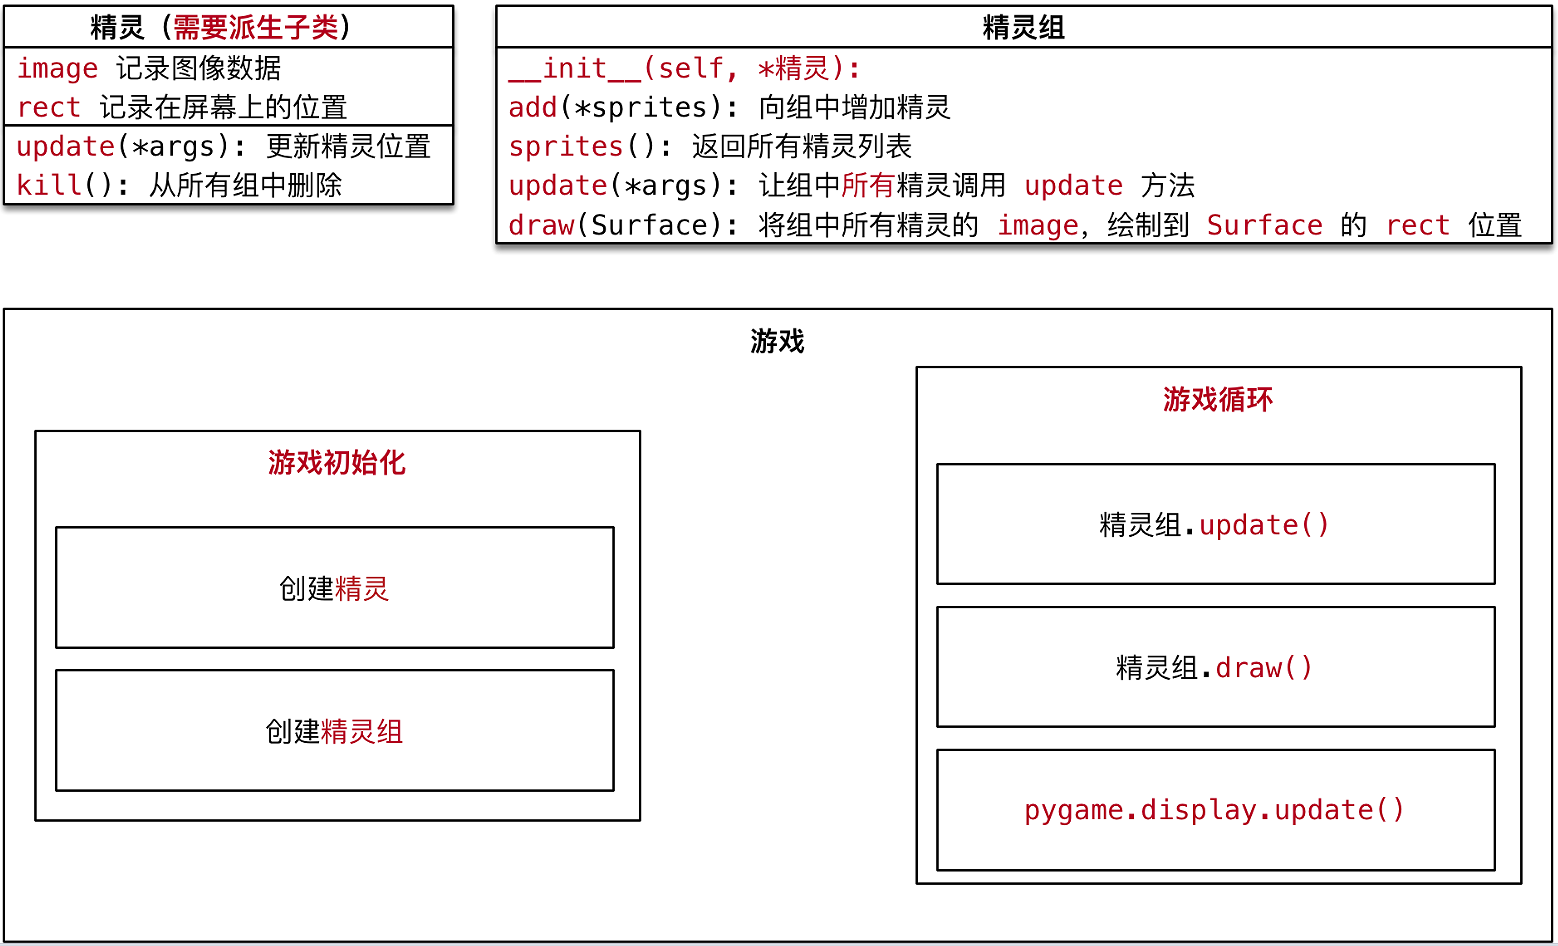